# Data Analysis

Este notebook tem como objetivo analisar um dataset com dados de compras, mais especificamente com dados dos pedidos.

Para isso, foram investigadas possíveis anomalias nos dados e insights que possam ser obtidos a partir deles.

## Setup

In [24]:
import pandas as pd
import datetime
from src.visualization import Visualization

visualization = Visualization()

## Load the data

In [25]:
df = pd.read_excel('sample.xls')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Podemos verificar que não há dados nulos no dataset.

In [27]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


## Investigação de Anomalias

Vamos fazer algumas checagens básicas de inconsistências nos dados:

- datas dentro de intervalos válidos
- order date < ship date
- discount entre 0.0 e 1.0

In [28]:
min_date = datetime.datetime(2000, 1, 1)
max_date = datetime.datetime.now()

order_date_min = len(df[df['Order Date']<min_date])
order_date_max = len(df[df['Order Date']>max_date])

print("Quantidade de Order Date foram do intervalo especificado: "+str(order_date_min+order_date_max))

Quantidade de Order Date foram do intervalo especificado: 0


In [29]:
min_date = datetime.datetime(2000, 1, 1)
max_date = datetime.datetime.now()

ship_date_min = len(df[df['Ship Date']<min_date])
ship_date_max = len(df[df['Ship Date']>max_date])

print("Quantidade de Ship Date foram do intervalo especificado: "+str(ship_date_min+ship_date_max))

Quantidade de Ship Date foram do intervalo especificado: 0


Agora vamos checar se a data de saída é maior que a data do pedido:

In [30]:
ship_order = len(df[df['Ship Date'] < df['Order Date']])

print("Quantidade de dados com data de saída maior que a data do pedido: "+str(ship_order))

Quantidade de dados com data de saída maior que a data do pedido: 0


Vamos checar se a porcentagem da coluna Discount está dentro do intervalo esperado

In [31]:
disc_g = len(df[df['Discount']>1.0])
disc_l = len(df[df['Discount']<0.0])

print("Quantidade de dados de Discount fora do intevalo esperado: "+str(disc_g+disc_l))

Quantidade de dados de Discount fora do intevalo esperado: 0


Agora vamos investigar algumas colunas específicas acerca de outliers:

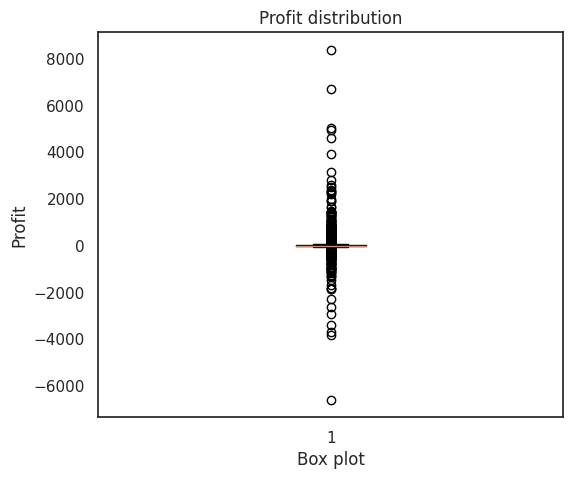

In [32]:
visualization.plot_distribution(list(df['Profit']), "Profit distribution", "Profit")

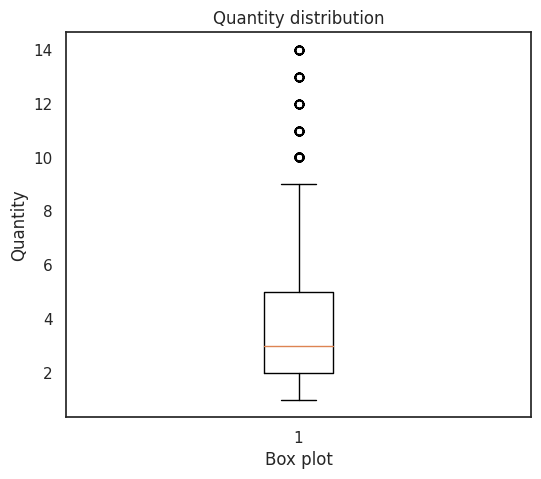

In [33]:
visualization.plot_distribution(list(df['Quantity']), "Quantity distribution", "Quantity")

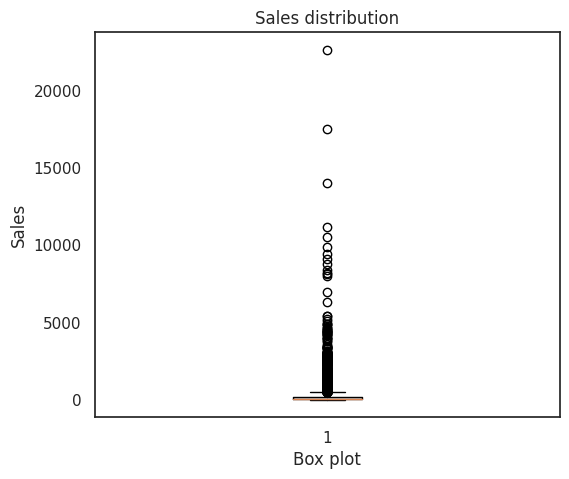

In [34]:
visualization.plot_distribution(list(df['Sales']), "Sales distribution", "Sales")

In [35]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Vamos checar se o id do produto corresponde a apenas um produto:

In [177]:
gp_by_id = df.groupby(['Product ID'])
gp_by_prod_id = df.groupby(['Product ID', 'Product Name'])

print("Quantidade de dados ao agrupar pelo ID do produto: "+str(len(gp_by_id)))
print("Quantidade de dados ao agrupar pelo ID e Nome do produto: "+str(len(gp_by_prod_id)))

Quantidade de dados ao agrupar pelo ID do produto: 1862
Quantidade de dados ao agrupar pelo ID e Nome do produto: 1894


Podemos ver que ao agrupar os dados apenas pelo ID do produto, obtemos uma quantidade diferente de produtos em relação ao agrupamento pelo ID e pelos nomes dos produtos. Logo, temos uma inconsistência nos dados. Vamos ver quais produtos têm nomes diferentes:

In [175]:
gp_by_prod_id.index.get_level_values(0).value_counts()

Product ID
TEC-PH-10001795    2
OFF-BI-10002026    2
OFF-PA-10003022    2
OFF-AR-10001149    2
OFF-PA-10001970    2
                  ..
OFF-AR-10004602    1
OFF-AR-10004587    1
OFF-AR-10004582    1
OFF-AR-10004511    1
TEC-PH-10004977    1
Name: count, Length: 1862, dtype: int64

Podemos ver que alguns produtos possuem dois nomes de produtos diferentes com o mesmo ID. Vamos visualizar um exemplo: 

In [176]:
gp_by_prod_id['TEC-PH-10001795']

Product Name
ClearOne CHATAttach 160 - speaker phone                                      13
RCA H5401RE1 DECT 6.0 4-Line Cordless Handset With Caller ID/Call Waiting     3
Name: Quantity, dtype: int64

## Análise dos dados

Vamos agrupar nossos dados por pedido:

In [64]:
gk = df.groupby('Order ID')
gk = gk.first()

Agora vamos visualizar a quantidade de pedidos vendidos em cada região, cidade e país

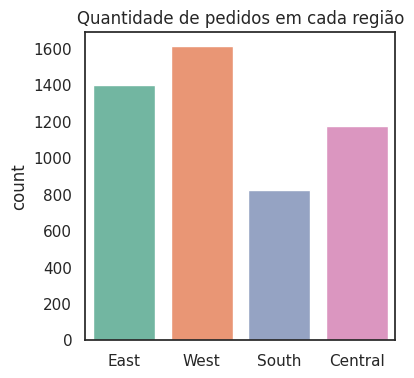

In [66]:
visualization.counter_plot(column="Region", title_graph="Quantidade de pedidos em cada região", df=gk)

Vamos ver os países que temos na nossa base

In [122]:
gk['Country'].value_counts()

Country
United States    5009
Name: count, dtype: int64

Vamos visualizar as top 10 cidades em que foram realizados mais pedidos:

In [123]:
city_list = gk['City'].value_counts()
city_list.head(10)

City
New York City    450
Los Angeles      384
San Francisco    265
Philadelphia     265
Seattle          212
Houston          188
Chicago          171
Columbus         111
San Diego         88
Dallas            80
Name: count, dtype: int64

Iremos analisar qual a categoria que possui mais pedidos

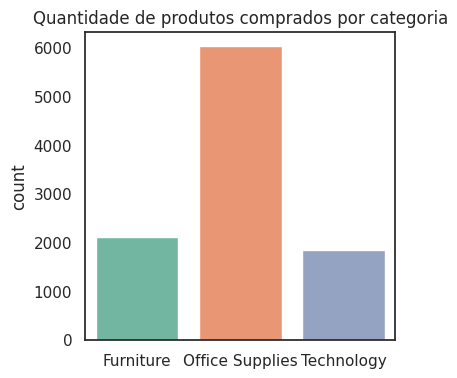

In [76]:
visualization.counter_plot(column="Category", title_graph="Quantidade de produtos comprados por categoria", df=df)

Agora vamos ver a distribuição dos pedidos por mês e ano.

In [119]:
gk['Month'] = gk['Order Date'].dt.month
gk['Year'] = gk['Order Date'].dt.year

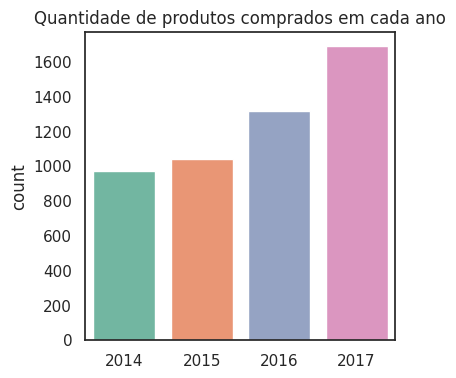

In [120]:
visualization.counter_plot(column="Year", title_graph="Quantidade de produtos comprados em cada ano", df=gk)

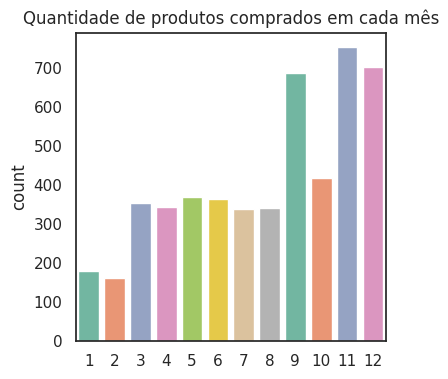

In [121]:
visualization.counter_plot(column="Month", title_graph="Quantidade de produtos comprados em cada mês", df=gk)

Vamos visualizar os top 10 produtos mais vendidos. Vamos assumir que o Product ID é a coluna que representa melhor consistência dos dados:

In [144]:
prod = df.groupby('Product ID')['Quantity'].sum()

prod = prod.sort_values(ascending=False)

prod[:10]

Product ID
TEC-AC-10003832    75
OFF-PA-10001970    70
OFF-BI-10001524    67
FUR-CH-10002647    64
OFF-BI-10002026    64
FUR-TA-10001095    61
TEC-AC-10002049    60
OFF-BI-10004728    59
FUR-CH-10003774    59
TEC-AC-10003038    57
Name: Quantity, dtype: int64

## Conclusões
- Alguns produtos apresentaram inconsistências em relação ao ID associado ao produto com o Nome do Produto (produtos com nomes diferentes associados ao mesmo ID)
- Dataset sem dados nulos
- Campos de datas estão dentro dos intervalos esperados
- Dados de desconto estão dentro do intervalo esperado
- Com as análises iniciais realizadas, não foram identificados outliers significativos

## Próximos passos

- Checar se ao agrupar por Order ID temos inconsistências em campos específicos. Por exemplo, um pedido não pode ser feito de regiões diferentes, cidades diferentes ou em datas diferentes.
- Checar se existe outliers na distância entre a data do pedido e a data de envio do pedido. Espera-se que sejam valores dentro de um certo intervalo.
- Realizar outras análises, como, por exemplo, distribuição dos dados ao longo do tempo.
- Visualizar categoria/produto com maior lucro (Profit)